## 1. 분류 기법 소개
- 분류 기법의 정의
- 분류 기법의 특징
- 대표 분류 기법 소개 (Knn, Decision tree)

------------------------------------------------------------------------------------------------------------------------------------

#### 분류 (Classification)
- 정의  
: 머신러닝 기법 중 하나로, 기존의 관측치(label)가 있는 training data를 기반으로 학습하는 방법. (=지도학습)  
: 사전에 Categorical 데이터 및 데이터의 label을 요구.  
: 지도학습으로 기존의 학습을 통하여, 새롭게 관측된 데이터의 category를 예측 가능  


- 종류
    1. KNN (K-Nearest Neighbor)    
    : 분류 기법 중 하나로, 데이터를 거리가 가장 가까운 k개의 데이터를참고하여 데이터를 분류하는 방법  
    : 데이터 간의 거리를 측정하기 위해, Euclidian Distance를 사용  → 모든 데이터를 비교해야 되기에 속도가 매우 느리다.  
    : K값에 따른 성능 차이 존재 (일반적으로 총 데이터의 제곱근 값을 사용)  
    :
    
    2. 의사결정트리 (Decision tree)   
    : Root 노드부터 시작하여, attributes에 따라 true, false를 나누고 데이터를 구분하는 학습 기법  
    : 데이터를 가장 잘 구분할 수 있는 질문을 기준으로 노드를 나눈 뒤 (엔트로피 낮→높), 이를 recursive하게 반복 


## 2. KNN(K-Nearest Neighbor) 실습 – KNN 기반 KDD 데이터 분류
- 데이터 로드 및 전처리
- sklearn 라이브러리를 활용한 학습
- 결과 확인

Dataset load를 위한 import 및 column 이름 설정

In [62]:
import pandas
from time import time
col_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", 
"land", "wrong_fragment", "urgent", "hot", 
"num_failed_logins", "logged_in", "num_compromised", "root_shell", 
"su_attempted", "num_root", "num_file_creations", 
"num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", 
"is_guest_login", "count", "srv_count", 
"serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", 
"same_srv_rate", "diff_srv_rate", 
"srv_diff_host_rate", "dst_host_count","dst_host_srv_count", 
"dst_host_same_srv_rate", "dst_host_diff_srv_rate", 
"dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", 
"dst_host_serror_rate", "dst_host_srv_serror_rate", 
"dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

10percent dataset load 및 확인
- 학습 속도를 위해 10percent dataset을 사용
- names 옵션에 방금 입력한 col_names를 입력
- head 함수를 통해 데이터셋 샘플 조회

In [63]:
kdd_data_10percent = pandas.read_csv("./datasets/kddcupdata/kddcup.data_10_percent_corrected", names = col_names)
kdd_data_10percent.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


Class별 데이터셋 개수 조회
- 딕셔너리 및 value_counts 함수를 활용하여 클래스 별 데이터 개수 조회

In [64]:
kdd_data_10percent['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

👉 데이터의 양이 극단적(280790,2)이라 좋은 데이터셋 X. 그래도 그냥 공부용으로 쓰도록 하자.

Categorical data 변환
- 학습에 사용할 categorical data를 조회

In [65]:
print(kdd_data_10percent.dtypes)

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Categorical data 변환
- pandas의 factorize 함수를 사용하여, categorical data를 정수화. (Ex.object 객체 제거)

In [66]:
kdd_data_10percent['protocol_type'], protocols= pandas.factorize(kdd_data_10percent['protocol_type'])
kdd_data_10percent['service'], services = pandas.factorize(kdd_data_10percent['service'])
kdd_data_10percent['flag'], flags = pandas.factorize(kdd_data_10percent['flag'])
kdd_data_10percent['label'], attacks = pandas.factorize(kdd_data_10percent['label'])
print(kdd_data_10percent.dtypes)

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

👉 factorize 메소드의 경우, 임의로 숫자를 매겨 Encoding시켜줌. (=범주형 변수의 값들을 숫자화)

Training set Test set 분류
- train_test_split 함수 기반의 train set / test set 분류

In [67]:
from sklearn.model_selection import train_test_split

# 기존에 정의했던 col_names를 사용하여 label과 features를 분리
X = kdd_data_10percent[col_names[:len(col_names)-1]]
Y = kdd_data_10percent['label'].copy()

# Train set과 Test set을 8:2 비율로 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)  

👉 정형화하여 뽑아낸 필요한 데이터 값만 X, Y에 따로 저장함.  
👉 train set이 70~80%가 적당하더라.이보다 너무 많거나 적으면 over/underfitting이 발생함.  
👉 random_state를 고정시켜 실행시마다 random하지 않도록 고정화.


In [68]:
# Train set label 조회
Y_train.value_counts()

5     224801
4      85640
0      77708
13      1765
15      1279
10      1039
20       827
9        819
8        788
7        217
17       183
6         44
1         26
19        19
11        18
14        10
22         8
2          7
12         6
18         6
16         2
21         2
3          2
Name: label, dtype: int64

In [69]:
# Test set label 조회
Y_test.value_counts()

5     55989
4     21561
0     19570
13      438
15      310
9       221
10      208
20      193
8       191
17       48
7        47
6         9
1         4
11        3
12        2
22        2
14        2
16        2
2         2
18        1
3         1
19        1
Name: label, dtype: int64

데이터 셋 축소
- 노트북 사용 시, 학습에 상당한 시간이 걸리므로 수업에서는 데이터 셋 10만개만을 사용

In [70]:
kdd_data_10percent = kdd_data_10percent[:100000]

# (추가된 코드)
X = kdd_data_10percent[col_names[:len(col_names)-1]]
Y = kdd_data_10percent['label'].copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)  

# Train set label 조회
Y_train.value_counts()

# Test set label 조회
Y_test.value_counts()

0     11398
4      4024
5      3784
13      350
10      154
15      106
9        59
17       46
8        44
6        10
7         9
19        6
11        3
14        2
1         1
12        1
16        1
18        1
2         1
Name: label, dtype: int64

⭐ (핵심) KNN 분류 모델 학습 및 결과 확인 ⭐
- n = 5로 학습
- n = 5의 결과 확인

In [71]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
t0 = time()
clf.fit(X_train, Y_train)
tt = time() - t0
print ("Classifier trained in {} seconds.".format(round(tt, 3)))

Classifier trained in 0.019 seconds.


In [ ]:
print ("Training Score:", clf.score(X_train, Y_train))
print ("Test_Score: ", clf.score(X_test, Y_test))

## 3. 의사결정트리(Decision Tree) 실습 – 결정트리 기반 KDD 데이터 분류
- 데이터 로드 및 전처리
- sklearn 라이브러리를 활용한 학습
- 결과 확인  
------------------------------------------------------------------------------------------------------------------------

sklearn의 DecisionTreeClassifier 함수를 사용
- 기존 KNN 실습에 이어서 데이터 셋을 사용한다

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=156)
trained_model = clf.fit(X_train, Y_train)
print ("Training Score:", trained_model.score(X_train, Y_train))
print ("Test_Score: ", trained_model.score(X_test, Y_test))

👉 KNN과 달리 모든 데이터를 비교하지 않고 통계적 추정을 이용하기에, 속도가 굉장히 빠르더라.

## 4. MNIST 데이터 분류 및 성능 측정
- MNIST 데이터 분류  
- 성능 측정 방법  

+) MNIST 데이터 셋이란?  고등학생과 미국 인구 조사국 직원들이 작성한 7,000 개의 작은 숫자 이미지  
+) 이미지 처리는 CNN이 최고더라. (처리 방식이 넘사)

-------------------------------------------------------------------------------------------

MNIST 데이터 셋
- 사이킷런의 헬퍼 함수를 이용한 데이터셋 다운로드

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True) 
mnist

MNIST 데이터 셋
- 딕셔너리 구조
    - 데이터 셋을 설명하는 DESCR
    - 셈플이 하나의 행, 특성이 하나의 열로 구성된 배열을 가진 data 키
    - 레이블 배열을 담고 있는 target 키

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape

In [ ]:
y.shape

MNIST 데이터 셋
- 샘플 한 개를 이미지화
    - 샘플의 특성 벡터를 추출해서 28x28배열로 크기를 바꾸고 맷플롯립의 imshow() 함수를 사용

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
X = np.array(X)
y = np.array(y)
some_digit = X[35]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
y[36000]

테스트 세트 생성
- MNIST 테이터 세트는 이미 훈련 세트와 테스트 세트로 나누어 놓음
    - 훈련 세트: 앞쪽 60,000개, 테스트 세트: 뒤쪽 10,000개
    - 훈련 세트를 섞어서 모든 교차 검증 폴드가 비슷해지도록 만들자
        - 하나의 폴드라도 특정 숫자가 누락되면 안 됨
        - 훈련 샘플의 순서에 민감한 학습 알고리즘도 있으므로 비슷한 샘플이 연이어 나타나면 안 됨

In [ ]:
# 훈련 데이터와 테스트 데이터를 나누기 위한 코드
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
#데이터 셔플링
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

----------------------------------------------------------------------------

##### 4-1. 이진 분류기 훈련
- 숫자 5를 식별하는 감지기를 만들어 보자.
    - 5’와 ‘~5’두 개의 클래스를 구분할 수 있는 이진 분류기 (binary classifier)
    - 타깃 벡터 생성

In [ ]:
# 5는 True고, 다른 숫자는 모두 False
y_train_5 = (y_train =='5')
y_test_5 = (y_test =='5')

- 분류 모델을 선택해서 훈련시킴
    - SGDClassifier 클래스를 사용해 확률적 경사 하강법(Stochastic Gradient Decent: SGD) 분류기 적용
    - 훈련할 때 무작위성을 사용함 – 결과를 재현하고 싶으면 random_state 매개변수를

In [ ]:
# SGDClassifier 모델 생성 및 훈련 코드
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

👉 학습시 속도가 굉장이 느리고 오래걸림. 대신 판단 속도가 빠르다.

In [ ]:
 sgd_clf.predict([some_digit])  # 숫자 5의 이미지를 감지

##### 4-2. 성능 측정
- cross_val_score() 함수로 폴드가 3개인 K(=3)-fold cross validation을 사용해 SGDClassifier 모델을 평가   
→ 'K(=3)-fold cross validation'이란 하나를 제외하여 training 후, 나머지 하나로 평가하는 방식

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

- (생략) 모든 이미지를 '5','~5' 클래스로 분류하는 더미 분류기 

In [ ]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

----------------------------------------------------------------------------

##### [4-2. 오차 행렬 (confusion matrix)](https://kimdingko-world.tistory.com/173)
- 오차 행렬을 만들려면 실제 타깃과 비교할 수 있도록 먼저 예측 값을 생성한다
    - cross_val_predice() 메서드를 사용  
    : K-fold 교차 검증을 수행하지만 평가 점수를 반환하지 않고 각 테스트 폴드에서 얻은 예측을 반환함

- 디시젼 트리   
단점: 데이터가 집중적으로 쏠려있을 경우, 다수의 비율의 데이터만 잘 분류해도 넘어가더라.

- 오차행렬  
tp = true positive = 둘다 O  
fn = false negative(모델 기준) = 실제 데이터 O. 모델 X.  
fp = false positive(모델 기준) = 실제 X. 모델 X.  
tn = true negative(모델 기준) = 실제 X. 모델 X.  
ACC = (TP + TN)/(TP + TN + FP + FN) 

- 정밀도 : 기계가 맞다고 생각하는 데이터를 넣었을 때 얼마나 정확한가 측정
- 재현율 : 맞는 데이터를 넣었을 때 얼마나 정확한 가 측정

## 5. 클러스터링 분석
- 클러스터링 분석이란?
- 데이터간 유사도
- 주요 클러스터링 기법
- 클러스터간 거리 측정
-------------------------------------------------------------------------------

- 클러스터링 분석이란?
    - 주어진 데이터의 특성을 고려하여 데이터 군집을 형성하여 데이터를 분석하는 기법
    - 각 클러스터는 비슷한 특성을 가진 데이터를 포함함.  
    ![](./img/cluster_img.PNG)
    

- 데이터간 유사도 정의  
    - 데이터 간 거리(Distance metrics)가 데이터 간 유사도를 나타내는 척도로 널리 사용됨 
    <p float="center">
    <img src = "./img/cluster.PNG" width = "50%" height = "100%"/>
    <img src = "./img/cluster2.PNG" width = "50%" height = "100%"/>
    </p>
- 주요 클러스터링 기법
![](./img/cluster3.PNG)

## 6. Dimensionality reduction
- Principal Component Analysis(PCA)

## 7. K-means Algorithm
- 알고리즘 설명
- Scikit-learn을 활용한 실습  
--------------------------------------------------------------------------------

- 알고리즘 설명  
: Partitioning 기반의 Clustering 알고리즘  
: 총 3단계로 구성되며 주로 마지막 두 단계가 반복 수행됨
: 알고리즘 과정  
    - Setp1. Centroids 초기화
    - Setp2. 오브젝트들을 가장 가까운 Centroid의 클러스터로 지정
    - Setp3. 각 클러스터의 새로운 Centroid를 계산
    - Setp4. Centroid가 수렴할 때까지 반복  
    
    
- 실습  
: LEGACY!!! 😡

## 8. DBSCAN Algorithm
- 알고리즘 설명
- Scikit-learn을 활용한 실습
- 과제 소개  
--------------------------------------------------------------------------------

- 알고리즘 설명  
: Density 기반의 clustering 알고리즘
: 알고리즘을 설명하기위해 다음 5가지 용어를 정의함  
    - Core, Eps, Noise, MinPts, Border  
    ![](./img/cluster3.PNG)
    
    

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
 col_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", 
"land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", 
"num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", 
"num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", 
"is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", 
"rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", 
"srv_diff_host_rate", "dst_host_count","dst_host_srv_count", "dst_host_same_srv_rate", 
"dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", 
"dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", 
"dst_host_srv_rerror_rate", "label"]

In [30]:
with open('./datasets/kddcupdata/kddcup.data_10_percent_corrected', 'r') as file:
    data = pd.read_csv(file, names=col_names)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [4]:
data['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [5]:
unique_labels = data['label'].unique()
unique_labels

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [33]:
selected_data = pd.DataFrame()
selected_data


""


In [40]:
selected_data = pd.concat([selected_data, data.loc[data['label'] == 'normal.'][:200]])
selected_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,tcp,http,SF,232,1721,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
196,0,tcp,http,SF,246,1718,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
197,0,tcp,http,SF,218,1484,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
198,0,tcp,http,SF,222,1651,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.


In [34]:
for label in unique_labels:
    selected_data = pd.concat([selected_data, data.loc[data['label'] == label][:200]])
selected_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.00,0.00,0.11,0.0,0.0,0.00,0.00,0.00,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.00,0.00,0.05,0.0,0.0,0.00,0.00,0.00,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142477,0,tcp,ftp_data,SF,0,5636,0,0,0,0,...,41,1.00,0.00,1.00,0.1,0.0,0.00,0.00,0.00,rootkit.
148154,61,tcp,telnet,SF,294,3929,0,0,0,0,...,4,0.02,0.02,0.00,0.0,0.0,0.25,0.73,0.25,rootkit.
397011,0,udp,other,SF,32,0,0,0,0,0,...,1,0.00,0.02,0.00,0.0,0.0,0.00,0.00,0.00,rootkit.
452001,0,udp,other,SF,4,4,0,0,0,0,...,1,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.00,rootkit.


In [7]:
labels = selected_data['label'].to_numpy()  # 데이터와 레이블 분리(=copy와 유사)
labels

array(['normal.', 'normal.', 'normal.', ..., 'rootkit.', 'rootkit.',
       'rootkit.'], dtype=object)

In [8]:
data = selected_data.drop('label', axis=1)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,9,1.00,0.00,0.11,0.0,0.0,0.00,0.00,0.00
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,19,1.00,0.00,0.05,0.0,0.0,0.00,0.00,0.00
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,29,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,39,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,49,1.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142477,0,tcp,ftp_data,SF,0,5636,0,0,0,0,...,1,41,1.00,0.00,1.00,0.1,0.0,0.00,0.00,0.00
148154,61,tcp,telnet,SF,294,3929,0,0,0,0,...,255,4,0.02,0.02,0.00,0.0,0.0,0.25,0.73,0.25
397011,0,udp,other,SF,32,0,0,0,0,0,...,255,1,0.00,0.02,0.00,0.0,0.0,0.00,0.00,0.00
452001,0,udp,other,SF,4,4,0,0,0,0,...,1,1,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.00


In [9]:
data['protocol_type'], _ = data['protocol_type'].factorize()
data['service'], _ = data['service'].factorize()
data['flag'], _ = data['flag'].factorize()

data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,0,181,5450,0,0,0,0,...,9,9,1.00,0.00,0.11,0.0,0.0,0.00,0.00,0.00
1,0,0,0,0,239,486,0,0,0,0,...,19,19,1.00,0.00,0.05,0.0,0.0,0.00,0.00,0.00
2,0,0,0,0,235,1337,0,0,0,0,...,29,29,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
3,0,0,0,0,219,1337,0,0,0,0,...,39,39,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
4,0,0,0,0,217,2032,0,0,0,0,...,49,49,1.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142477,0,0,2,0,0,5636,0,0,0,0,...,1,41,1.00,0.00,1.00,0.1,0.0,0.00,0.00,0.00
148154,61,0,1,0,294,3929,0,0,0,0,...,255,4,0.02,0.02,0.00,0.0,0.0,0.25,0.73,0.25
397011,0,2,17,0,32,0,0,0,0,0,...,255,1,0.00,0.02,0.00,0.0,0.0,0.00,0.00,0.00
452001,0,2,17,0,4,4,0,0,0,0,...,1,1,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.00


In [10]:
scaler = MinMaxScaler()   # 일정하지 않은 데이터 개수를 조정해줌.
data = scaler.fit_transform(data)

In [11]:
data[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.61041764e-07, 1.05713002e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.37254902e-02, 1.37254902e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.14960630e-02,
       3.14960630e-02, 1.00000000e+00, 0.00000000e+00, 1.10000000e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [12]:
 data = PCA(n_components=3).fit_transform(data)

In [13]:
colors = [plt.cm.Spectral(e) for e in np.linspace(0, 1, len(unique_labels))]  # 색에 대한 레이블링 노가다 하기 싫어서 만든 코드

In [14]:
def gen_color_dict(_unique_labels, _colors):
    color_dict = dict()
    for i in range(len(_unique_labels)):
        color_dict[_unique_labels[i]] = _colors[i]
    return color_dict

In [15]:
gt_color_dict = gen_color_dict(unique_labels, colors)

In [16]:
gt_color_dict

{'normal.': (0.6196078431372549,
  0.00392156862745098,
  0.25882352941176473,
  1.0),
 'buffer_overflow.': (0.7126489811610919,
  0.10711264898116109,
  0.28081507112648985,
  1.0),
 'loadmodule.': (0.8141484044598232,
  0.2196847366397539,
  0.3048058439061899,
  1.0),
 'perl.': (0.8758169934640523, 0.3045751633986928, 0.29411764705882354, 1.0),
 'neptune.': (0.9330257593233372,
  0.3913110342176086,
  0.27197231833910035,
  1.0),
 'smurf.': (0.9665513264129182, 0.49742406766628217, 0.295040369088812, 1.0),
 'guess_passwd.': (0.9817762399077278,
  0.6073817762399076,
  0.3457900807381776,
  1.0),
 'pod.': (0.9928489042675894, 0.716955017301038, 0.40945790080738165, 1.0),
 'teardrop.': (0.9946943483275663,
  0.8092272202998846,
  0.48696655132641287,
  1.0),
 'portsweep.': (0.9963860053825452,
  0.8879661668589004,
  0.5610918877354863,
  1.0),
 'ipsweep.': (0.9982314494425221, 0.9451749327181853, 0.6570549788542868, 1.0),
 'land.': (0.998077662437524, 0.9992310649750096, 0.7460207612

In [17]:
colors = [plt.cm.Spectral(e) for e in np.linspace(0, 1, len(unique_labels))]

In [18]:
colors

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.7126489811610919, 0.10711264898116109, 0.28081507112648985, 1.0),
 (0.8141484044598232, 0.2196847366397539, 0.3048058439061899, 1.0),
 (0.8758169934640523, 0.3045751633986928, 0.29411764705882354, 1.0),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035, 1.0),
 (0.9665513264129182, 0.49742406766628217, 0.295040369088812, 1.0),
 (0.9817762399077278, 0.6073817762399076, 0.3457900807381776, 1.0),
 (0.9928489042675894, 0.716955017301038, 0.40945790080738165, 1.0),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287, 1.0),
 (0.9963860053825452, 0.8879661668589004, 0.5610918877354863, 1.0),
 (0.9982314494425221, 0.9451749327181853, 0.6570549788542868, 1.0),
 (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0),
 (0.9557862360630527, 0.9823144944252211, 0.6800461361014996, 1.0),
 (0.9096501345636295, 0.9638600538254518, 0.6080738177623992, 1.0),
 (0.8202998846597465, 0.9275663206459055, 

In [19]:
def gen_color_dict(_unique_labels, _colors):
    color_dict = dict()
    for i in range(len(_unique_labels)):
        color_dict[_unique_labels[i]] = _colors[i]
    return color_dict

In [20]:
gt_color_dict = gen_color_dict(unique_labels, colors)

In [21]:
gt_color_dict

{'normal.': (0.6196078431372549,
  0.00392156862745098,
  0.25882352941176473,
  1.0),
 'buffer_overflow.': (0.7126489811610919,
  0.10711264898116109,
  0.28081507112648985,
  1.0),
 'loadmodule.': (0.8141484044598232,
  0.2196847366397539,
  0.3048058439061899,
  1.0),
 'perl.': (0.8758169934640523, 0.3045751633986928, 0.29411764705882354, 1.0),
 'neptune.': (0.9330257593233372,
  0.3913110342176086,
  0.27197231833910035,
  1.0),
 'smurf.': (0.9665513264129182, 0.49742406766628217, 0.295040369088812, 1.0),
 'guess_passwd.': (0.9817762399077278,
  0.6073817762399076,
  0.3457900807381776,
  1.0),
 'pod.': (0.9928489042675894, 0.716955017301038, 0.40945790080738165, 1.0),
 'teardrop.': (0.9946943483275663,
  0.8092272202998846,
  0.48696655132641287,
  1.0),
 'portsweep.': (0.9963860053825452,
  0.8879661668589004,
  0.5610918877354863,
  1.0),
 'ipsweep.': (0.9982314494425221, 0.9451749327181853, 0.6570549788542868, 1.0),
 'land.': (0.998077662437524, 0.9992310649750096, 0.7460207612

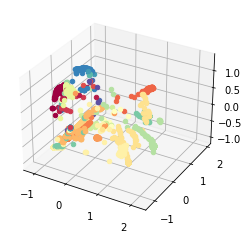

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(data)):
    ax.scatter(data[i][0], data[i][1], data[i][2], c=[gt_color_dict[labels[i]]])
plt.show()

In [24]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(data)

DBSCAN(eps=0.3, min_samples=10)

In [25]:
dbscan_label = dbscan.labels_
dbscan_unique_labels = list(set(dbscan_label))
colors = [plt.cm.Spectral(e) for e in np.linspace(0, 1, len(dbscan_unique_labels))]
dbscan_color_dict = gen_color_dict(dbscan_unique_labels, colors)

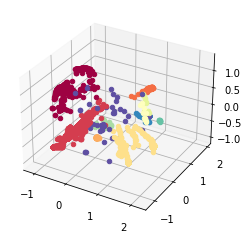

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(data)):
    ax.scatter(data[i][0], data[i][1], data[i][2], 
c=[dbscan_color_dict[dbscan_label[i]]])
plt.show()

In [29]:
n_clusters_ = len(set(dbscan_label)) - (1 if -1 in dbscan_label else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, dbscan_label))
print("Completeness: %0.3f" % metrics.completeness_score(labels, dbscan_label))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, dbscan_label))

Estimated number of clusters: 10
Homogeneity: 0.525
Completeness: 0.844
V-measure: 0.647
